In [ ]:
# Import all the necessary functions here
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import pandas as pd
import dask.dataframe as dd

import numpy as np
from numpy.lib.shape_base import split

import os
import tensorflow as tf
from tensorflow.keras.regularizers import L2
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Pathing to file directory

data_30 = !ls gdrive/MyDrive/'Length Prediction'/'30cm'
data_28 = !ls gdrive/MyDrive/'Length Prediction'/'28cm'
data_26 = !ls gdrive/MyDrive/'Length Prediction'/'26cm'
data_24 = !ls gdrive/MyDrive/'Length Prediction'/'24cm'
data_22 = !ls gdrive/MyDrive/'Length Prediction'/'22cm'
data_20 = !ls gdrive/MyDrive/'Length Prediction'/'20cm'
data_18 = !ls gdrive/MyDrive/'Length Prediction'/'18cm'
data_16 = !ls gdrive/MyDrive/'Length Prediction'/'16cm'
data_14 = !ls gdrive/MyDrive/'Length Prediction'/'14cm'
data_12 = !ls gdrive/MyDrive/'Length Prediction'/'12cm'

data_files = [data_12, data_14, data_16, data_18, data_20, data_22, data_24, data_26, data_28, data_30]

In [ ]:
# Just checking to make sure the files are all there
temp = []
data_labels = []
for row in range(len(data_files)):
  temp.append(data_files[row][0].split("  "))
for row in range(len(temp)):
  a = []
  t = []
  for item in temp[row]:
    t = item.split("\t")
    for t_item in t:
      a.append(t_item)
  data_labels.append(a)

data_labels

[['12cm_10min_Sarah.csv'],
 ['14cm_10min_Sarah.csv'],
 ['16cm_10min_Sarah.csv',
  'Ainsley_16cm_5min.csv',
  'Bowen_5_min.csv',
  'Sarah_16cm_5min.csv',
  'Terry_16cm.csv'],
 ['18cm_10min_Sarah.csv',
  'Ainsley_18cm_5min.csv',
  'Bowen_8_min.csv',
  'Sarah_18cm_5min.csv',
  'Terry_18cm.csv'],
 ['20cm_10min_Sarah.csv',
  'Ainsley_20cm_5min.csv',
  'Bowen_5_min.csv',
  'Sarah_20cm_5min.csv',
  'Terry_20cm.csv'],
 ['22cm_10min_Sarah.csv',
  'Ainsley_22cm_5min.csv',
  'Bowen_5_min.csv',
  'Sarah_22cm_5min.csv',
  'Terry_22cm.csv'],
 ['Ainsley_24cm_5min.csv',
  'Bowen_5_min.csv',
  'Sarah_24cm_5min.csv',
  'Terry_24cm.csv'],
 ['Ainsley_26cm_5min.csv', 'Bowen_5_min.csv', 'Terry_26cm.csv'],
 ['Ainsley_28cm_5min.csv', 'Bowen_5_min.csv', 'Terry_28cm.csv'],
 ['Ainsley_30cm_5min.csv', 'Bowen_5_min.csv', 'Terry_30cm.csv']]

In [ ]:
pwd = "/content/gdrive/MyDrive/Length Prediction"

raw_12 = pd.read_csv(pwd+"/12cm/" + data_labels[0][0], header=1)
for file_name in range(1, len(data_labels[0])):
  raw_12 = pd.concat((raw_12, pd.read_csv(pwd + "/12cm/" + data_labels[0][file_name], header=1)))

raw_14 = pd.read_csv(pwd + "/14cm/" + data_labels[1][0], header=1)
for file_name in range(1, len(data_labels[1])):
  raw_14 = pd.concat((raw_14, pd.read_csv(pwd + "/14cm/" + data_labels[1][file_name], header=1)))

raw_16 = pd.read_csv(pwd + "/16cm/" + data_labels[2][0], header=1)
for file_name in range(1, len(data_labels[2])):
  print(data_labels[2][file_name])
  raw_16 = pd.concat((raw_16, pd.read_csv(pwd + "/16cm/" + data_labels[2][file_name], header=1)))

raw_18 = pd.read_csv(pwd + "/18cm/" + data_labels[3][0], header=1)
for file_name in range(1, len(data_labels[3])):
  print(data_labels[3][file_name])
  raw_18 = pd.concat((raw_18, pd.read_csv(pwd + "/18cm/" + data_labels[3][file_name], header=1)))

raw_20 = pd.read_csv(pwd + "/20cm/" + data_labels[4][0], header=1)
for file_name in range(1, len(data_labels[4])):
  print(data_labels[4][file_name])
  raw_20 = pd.concat((raw_20, pd.read_csv(pwd + "/20cm/" + data_labels[4][file_name], header=1)))

raw_22 = pd.read_csv(pwd + "/22cm/" + data_labels[5][0], header=1)
for file_name in range(1, len(data_labels[5])):
  print(data_labels[5][file_name])
  raw_22 = pd.concat((raw_22, pd.read_csv(pwd + "/22cm/" + data_labels[5][file_name], header=1)))

raw_24 = pd.read_csv(pwd + "/24cm/" + data_labels[6][0], header=1)
for file_name in range(1, len(data_labels[6])):
  print(data_labels[6][file_name])
  raw_24 = pd.concat((raw_24, pd.read_csv(pwd + "/24cm/" + data_labels[6][file_name], header=1)))

raw_26 = pd.read_csv(pwd + "/26cm/" + data_labels[7][0], header=1)
for file_name in range(1, len(data_labels[7])):
  print(data_labels[7][file_name])
  raw_26 = pd.concat((raw_26, pd.read_csv(pwd + "/26cm/" + data_labels[7][file_name], header=1)))

raw_28 = pd.read_csv(pwd + "/28cm/" + data_labels[8][0], header=1)
for file_name in range(1, len(data_labels[8])):
  print(data_labels[8][file_name])
  raw_28 = pd.concat((raw_28, pd.read_csv(pwd + "/28cm/" + data_labels[8][file_name], header=1)))

raw_30 = pd.read_csv(pwd + "/30cm/" + data_labels[9][0], header=1)
for file_name in range(1, len(data_labels[9])):
  print(data_labels[9][file_name])
  raw_30 = pd.concat((raw_30, pd.read_csv(pwd + "/30cm/" + data_labels[9][file_name], header=1)))

Ainsley_16cm_5min.csv
Bowen_5_min.csv
Sarah_16cm_5min.csv
Terry_16cm.csv
Ainsley_18cm_5min.csv
Bowen_8_min.csv
Sarah_18cm_5min.csv
Terry_18cm.csv
Ainsley_20cm_5min.csv
Bowen_5_min.csv
Sarah_20cm_5min.csv
Terry_20cm.csv
Ainsley_22cm_5min.csv
Bowen_5_min.csv
Sarah_22cm_5min.csv
Terry_22cm.csv
Bowen_5_min.csv
Sarah_24cm_5min.csv
Terry_24cm.csv
Bowen_5_min.csv
Terry_26cm.csv
Bowen_5_min.csv
Terry_28cm.csv
Bowen_5_min.csv
Terry_30cm.csv


In [ ]:
raw_16

,sample_count,sample_time,green,green2,ir,red,acceleration_x,acceleration_y,acceleration_z,op_mode,...,spo2_unreliable_r,spo2_state,scd_state,walking_steps,running_steps,calorie,totalActEnergy,ibiOffset,timestamp,timestamp_millis
0,0,1970-01-19-23:21:18,47120,47073,524287,524287,0.443,-0.143,0.943,0,...,0,0,2,0,0,0.0,0.0,0,2024-02-02-16:43:26,1706910206827
1,1,1970-01-19-23:21:40,47202,47155,524287,524287,0.462,-0.173,0.956,0,...,0,0,2,0,0,0.0,0.0,0,2024-02-02-16:43:26,1706910206875
2,2,1970-01-19-23:21:59,47218,47175,524287,524287,0.442,-0.223,0.947,0,...,0,0,2,0,0,0.0,0.0,0,2024-02-02-16:43:26,1706910206883
3,3,1970-01-19-23:22:19,85183,85190,524287,524287,0.461,-0.197,0.907,0,...,0,0,2,0,0,0.0,0.0,0,2024-02-02-16:43:26,1706910206889
4,4,1970-01-19-23:22:40,118219,118298,524287,524287,0.432,0.008,0.835,0,...,0,0,2,0,0,0.0,0.0,0,2024-02-02-16:43:26,1706910206896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,230,1970-01-06-07:09:02,146967,146767,371791,403156,0.819,0.162,0.588,0,...,0,0,3,143,0,1.0,0.0,0,2023-08-29-16:31:26,1693341086123
8159,231,1970-01-06-07:09:31,147208,147011,371812,403301,0.880,0.026,0.651,0,...,0,0,3,143,0,1.0,0.0,0,2023-08-29-16:31:26,1693341086133
8160,232,1970-01-06-07:10:32,146787,146593,371515,402906,0.857,0.042,0.672,0,...,0,0,3,143,0,1.0,0.0,0,2023-08-29-16:31:26,1693341086211
8161,233,1970-01-06-07:11:02,146640,146442,371503,402920,0.808,0.048,0.631,0,...,0,0,3,143,0,1.0,0.0,0,2023-08-29-16:31:26,1693341086222


In [ ]:
#Filter the data

arm_length_12 = raw_12[["sample_time", "acceleration_x", "acceleration_y", "acceleration_z"]]
arm_length_12["length"] = 12

arm_length_14 = raw_14[["sample_time", "acceleration_x", "acceleration_y", "acceleration_z"]]
arm_length_14["length"] = 14

arm_length_16 = raw_16[["sample_time", "acceleration_x", "acceleration_y", "acceleration_z"]]
arm_length_16["length"] = 16

arm_length_18 = raw_18[["sample_time", "acceleration_x", "acceleration_y", "acceleration_z"]]
arm_length_18["length"] = 18

arm_length_20 = raw_20[["sample_time", "acceleration_x", "acceleration_y", "acceleration_z"]]
arm_length_20["length"] = 20

arm_length_22 = raw_22[["sample_time", "acceleration_x", "acceleration_y", "acceleration_z"]]
arm_length_22["length"] = 22

arm_length_24 = raw_24[["sample_time", "acceleration_x", "acceleration_y", "acceleration_z"]]
arm_length_24["length"] = 24

arm_length_26 = raw_26[["sample_time", "acceleration_x", "acceleration_y", "acceleration_z"]]
arm_length_26["length"] = 26

arm_length_28 = raw_28[["sample_time", "acceleration_x", "acceleration_y", "acceleration_z"]]
arm_length_28["length"] = 28

arm_length_30 = raw_30[["sample_time", "acceleration_x", "acceleration_y", "acceleration_z"]]
arm_length_30["length"] = 30

arm_length_16

<ipython-input-7-28a60ca4f8cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_length_12["length"] = 12
<ipython-input-7-28a60ca4f8cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_length_14["length"] = 14
<ipython-input-7-28a60ca4f8cf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,sample_time,acceleration_x,acceleration_y,acceleration_z,length
0,1970-01-19-23:21:18,0.443,-0.143,0.943,16
1,1970-01-19-23:21:40,0.462,-0.173,0.956,16
2,1970-01-19-23:21:59,0.442,-0.223,0.947,16
3,1970-01-19-23:22:19,0.461,-0.197,0.907,16
4,1970-01-19-23:22:40,0.432,0.008,0.835,16
...,...,...,...,...,...
8158,1970-01-06-07:09:02,0.819,0.162,0.588,16
8159,1970-01-06-07:09:31,0.880,0.026,0.651,16
8160,1970-01-06-07:10:32,0.857,0.042,0.672,16
8161,1970-01-06-07:11:02,0.808,0.048,0.631,16


In [ ]:
# Put it in a tensor, so that we can unfold it

tt_accels_12 = torch.tensor(arm_length_12[["acceleration_x", 'acceleration_y', 'acceleration_z']].values)
tt_accels_14 = torch.tensor(arm_length_14[["acceleration_x", 'acceleration_y', 'acceleration_z']].values)
tt_accels_16 = torch.tensor(arm_length_16[["acceleration_x", 'acceleration_y', 'acceleration_z']].values)
tt_accels_18 = torch.tensor(arm_length_18[["acceleration_x", 'acceleration_y', 'acceleration_z']].values)
tt_accels_20 = torch.tensor(arm_length_20[["acceleration_x", 'acceleration_y', 'acceleration_z']].values)
tt_accels_22 = torch.tensor(arm_length_22[["acceleration_x", 'acceleration_y', 'acceleration_z']].values)
tt_accels_24 = torch.tensor(arm_length_24[["acceleration_x", 'acceleration_y', 'acceleration_z']].values)
tt_accels_26 = torch.tensor(arm_length_26[["acceleration_x", 'acceleration_y', 'acceleration_z']].values)
tt_accels_28 = torch.tensor(arm_length_28[["acceleration_x", 'acceleration_y', 'acceleration_z']].values)
tt_accels_30 = torch.tensor(arm_length_30[["acceleration_x", 'acceleration_y', 'acceleration_z']].values)

tt_accels_16

tensor([[ 0.4430, -0.1430,  0.9430],
        [ 0.4620, -0.1730,  0.9560],
        [ 0.4420, -0.2230,  0.9470],
        ...,
        [ 0.8570,  0.0420,  0.6720],
        [ 0.8080,  0.0480,  0.6310],
        [ 0.7870,  0.0730,  0.5640]], dtype=torch.float64)

In [ ]:
chunk, step = 2000, 5

unfolded_tt_accels_12 = tt_accels_12.unfold(0, chunk, step).numpy()
unfolded_tt_accels_14 = tt_accels_14.unfold(0, chunk, step).numpy()
unfolded_tt_accels_16 = tt_accels_16.unfold(0, chunk, step).numpy()
unfolded_tt_accels_18 = tt_accels_18.unfold(0, chunk, step).numpy()
unfolded_tt_accels_20 = tt_accels_20.unfold(0, chunk, step).numpy()
unfolded_tt_accels_22 = tt_accels_22.unfold(0, chunk, step).numpy()
unfolded_tt_accels_24 = tt_accels_24.unfold(0, chunk, step).numpy()
unfolded_tt_accels_26 = tt_accels_26.unfold(0, chunk, step).numpy()
unfolded_tt_accels_28 = tt_accels_28.unfold(0, chunk, step).numpy()
unfolded_tt_accels_30 = tt_accels_30.unfold(0, chunk, step).numpy()

unfolded_tt_accels_16.shape

(8763, 3, 2000)

In [ ]:
# Putting all the data together and identifying how many labels I'll need

combined_totals = [unfolded_tt_accels_12, unfolded_tt_accels_14, unfolded_tt_accels_16, unfolded_tt_accels_18, unfolded_tt_accels_20, unfolded_tt_accels_22, unfolded_tt_accels_24, unfolded_tt_accels_26, unfolded_tt_accels_28, unfolded_tt_accels_30]
labels = [12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

train_data = []
test_data = []
train_labels = []
test_labels = []

split_percentage = 0.8 # 80% for training, 20% for testing

for data, label in zip(combined_totals, labels):
    split_index = int(len(data) * split_percentage)
    # Split the data into training and testing sets
    train_data.append(data[:split_index, :3])
    test_data.append(data[split_index:, :3])
    # Create labels for the data
    train_labels.append(np.full(split_index, label))
    test_labels.append(np.full(len(data) - split_index, label))

# Concatenate the training and testing data and labels
train_data = np.concatenate(train_data, axis=0)
test_data = np.concatenate(test_data, axis=0)
train_labels = np.concatenate(train_labels, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((50643, 3, 2000), (12667, 3, 2000), (50643,), (12667,))

# Building ML Model


In [ ]:
normalizer = layers.Normalization(input_shape=[3, 2000], axis=-1)

In [ ]:
# Add more neurons, add dense layers
model = tf.keras.Sequential([normalizer])
model.add(layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(3, chunk)))
model.add(layers.LSTM(64, activation='relu'))

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Dense(1, activation='relu'))

In [ ]:
model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mean_squared_error',
        metrics=[keras.metrics.MeanAbsoluteError()]
    )

In [ ]:
history = model.fit(
    train_data,
    train_labels,
    epochs=15,
    # Calculate validation results on 20% of the training data.
    validation_data=(test_data, test_labels))

Epoch 1/15
1583/1583 [==============================] - 37s 21ms/step - loss: 27.1205 - mean_absolute_error: 3.6340 - val_loss: 26.9442 - val_mean_absolute_error: 4.2637
Epoch 2/15
1583/1583 [==============================] - 34s 22ms/step - loss: 15.2028 - mean_absolute_error: 3.0077 - val_loss: 25.0989 - val_mean_absolute_error: 4.0638
Epoch 3/15
1583/1583 [==============================] - 32s 20ms/step - loss: 13.7167 - mean_absolute_error: 2.8663 - val_loss: 28.1763 - val_mean_absolute_error: 4.2439
Epoch 4/15
1583/1583 [==============================] - 36s 23ms/step - loss: 13.4276 - mean_absolute_error: 2.8514 - val_loss: 24.0695 - val_mean_absolute_error: 3.8273
Epoch 5/15
1583/1583 [==============================] - 32s 20ms/step - loss: 13.6010 - mean_absolute_error: 2.8762 - val_loss: 27.8986 - val_mean_absolute_error: 4.3549
Epoch 6/15
1583/1583 [==============================] - 34s 22ms/step - loss: 13.2924 - mean_absolute_error: 2.8484 - val_loss: 31.2060 - val_mean_abs

In [ ]:
predictions = model.predict(test_data)

396/396 [==============================] - 3s 7ms/step


In [ ]:
predictions = predictions.T[0]

In [ ]:
predictions

array([[20.709785, 20.709785, 20.709785, ..., 20.709785, 20.709785,
        20.709785],
       [20.709785, 20.709785, 20.709785, ..., 20.709785, 20.709785,
        20.709785],
       [20.709787, 20.709787, 20.709787, ..., 20.709785, 20.709785,
        20.709785]], dtype=float32)

In [ ]:
errors = []

for prediction_val, true_val in zip(predictions, test_labels):
  errors.append(prediction_val - true_val)

Text(0, 0.5, 'Number of Predictions')

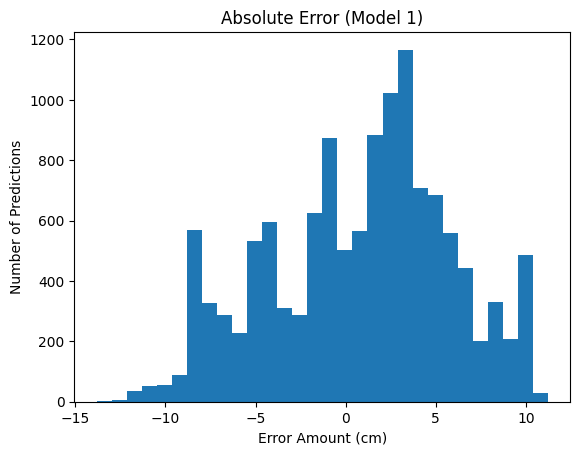

In [ ]:
plt.hist(errors, bins=30)
plt.title("Absolute Error (Model 1)")
plt.xlabel("Error Amount (cm)")
plt.ylabel("Number of Predictions")

Text(0, 0.5, 'Number of Predictions')

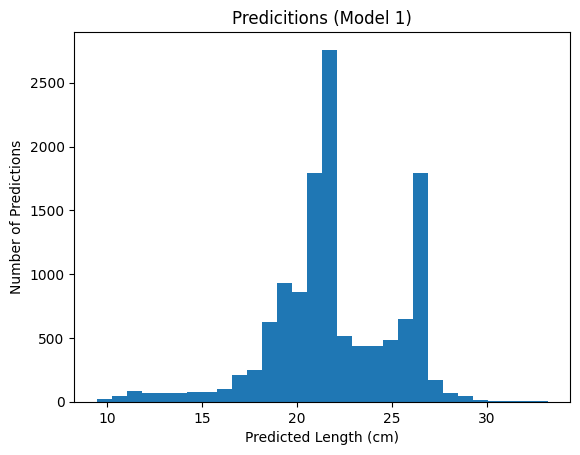

In [ ]:
plt.hist(predictions, bins=30)
plt.title("Predicitions (Model 1)")
plt.xlabel("Predicted Length (cm)")
plt.ylabel("Number of Predictions")

Text(0, 0.5, 'Number of Predictions')

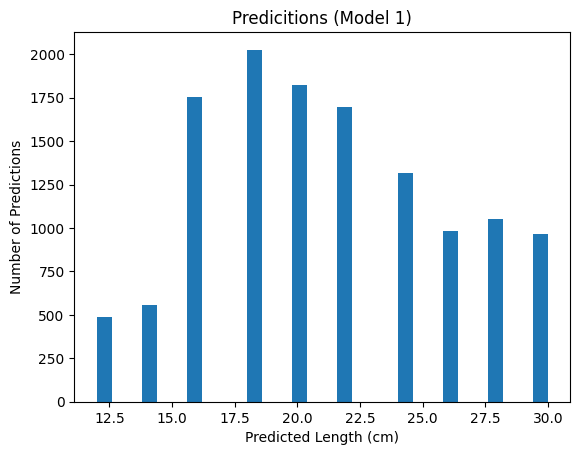

In [ ]:
plt.hist(test_labels, bins=30)
plt.title("Predicitions (Model 1)")
plt.xlabel("Predicted Length (cm)")
plt.ylabel("Number of Predictions")